In [5]:
#get directory path
import os
os.getcwd()

'C:\\Users\\rajar\\Coding for Cornell\\Starwatching_Calculations_for_Capstone'

In [6]:
os.chdir('C:\\Users\\rajar\\Coding for Cornell\\Starwatching_Calculations_for_Capstone')
path = os.getcwd()
path

'C:\\Users\\rajar\\Coding for Cornell\\Starwatching_Calculations_for_Capstone'

# Classification of light pollution using population density

## Problem statement
This is important because if you want to go starwatching but don't know the light pollution levels, you don't have to have pre-existing knowledge or equipment to measure them. With this tool, you can calculate the light pollution without even needing to be there. This tool can also show, as the population increases, you can see how the light pollution increases

## Data
    My data is a reading of light pollution from across the United States. "Globe at Night is an international citizen-science campaign to raise public awareness of the impact of light pollution by inviting citizen-scientists to measure & submit their night sky brightness observations." (Globe at Night 2025) The data is available in JSON and CSV formats. The source link is: https://globeatnight.org/documents/926/GaN2024.csv.
    This data works well for this problem because it has readings for light pollution across the world, and that means I can also expand to other parts of the world. Also, it has multiple forms of measuring light pollution.

## Approach
I am using classification to sort light pollution into high, medium, and low using population density. Supervised learning models are a subsection of machine learning that learn from labeled data. Meaning each input is paired with a corresponding output. This means that the population density will be paired with a light pollution level.

In [7]:
#import packages
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

In [8]:
# Read in dataframes
df1 = pd.read_csv('data/PopulationDensity.csv')
df2 = pd.read_csv('data/state_data.csv')

# Change column names to match on 'State' column
df1.columns = ['Ranking', 'State', 'Population Density']

# Merge df1 and df2 on the 'State' column (inner join by default)
test_df = pd.merge(df1, df2, on='State')

test_df.head()

,Ranking,State,Population Density,LimitingMag,BortleClass
0,1,New Jersey,1259,3.0,9
1,2,Rhode Island,1055,3.0,9
2,3,Massachusetts,894,3.0,9
3,4,Connecticut,749,3.0,9
4,5,Maryland,634,3.0,9


In [9]:
# Let's make a mapping function!
def map_function (df, column_name, new_column_name):
    keys = df[column_name].unique()
    values = [i for i in range(len(keys))]
    y_dict = dict(zip(keys, values))
    df[new_column_name] = df[column_name].map(y_dict)
    return df

In [30]:
processed_df = map_function(test_df, 'BortleClass', 'labels')
processed_df.head()

,Ranking,State,Population Density,LimitingMag,BortleClass,labels
0,1,New Jersey,1259,3.0,9,0
1,2,Rhode Island,1055,3.0,9,0
2,3,Massachusetts,894,3.0,9,0
3,4,Connecticut,749,3.0,9,0
4,5,Maryland,634,3.0,9,0


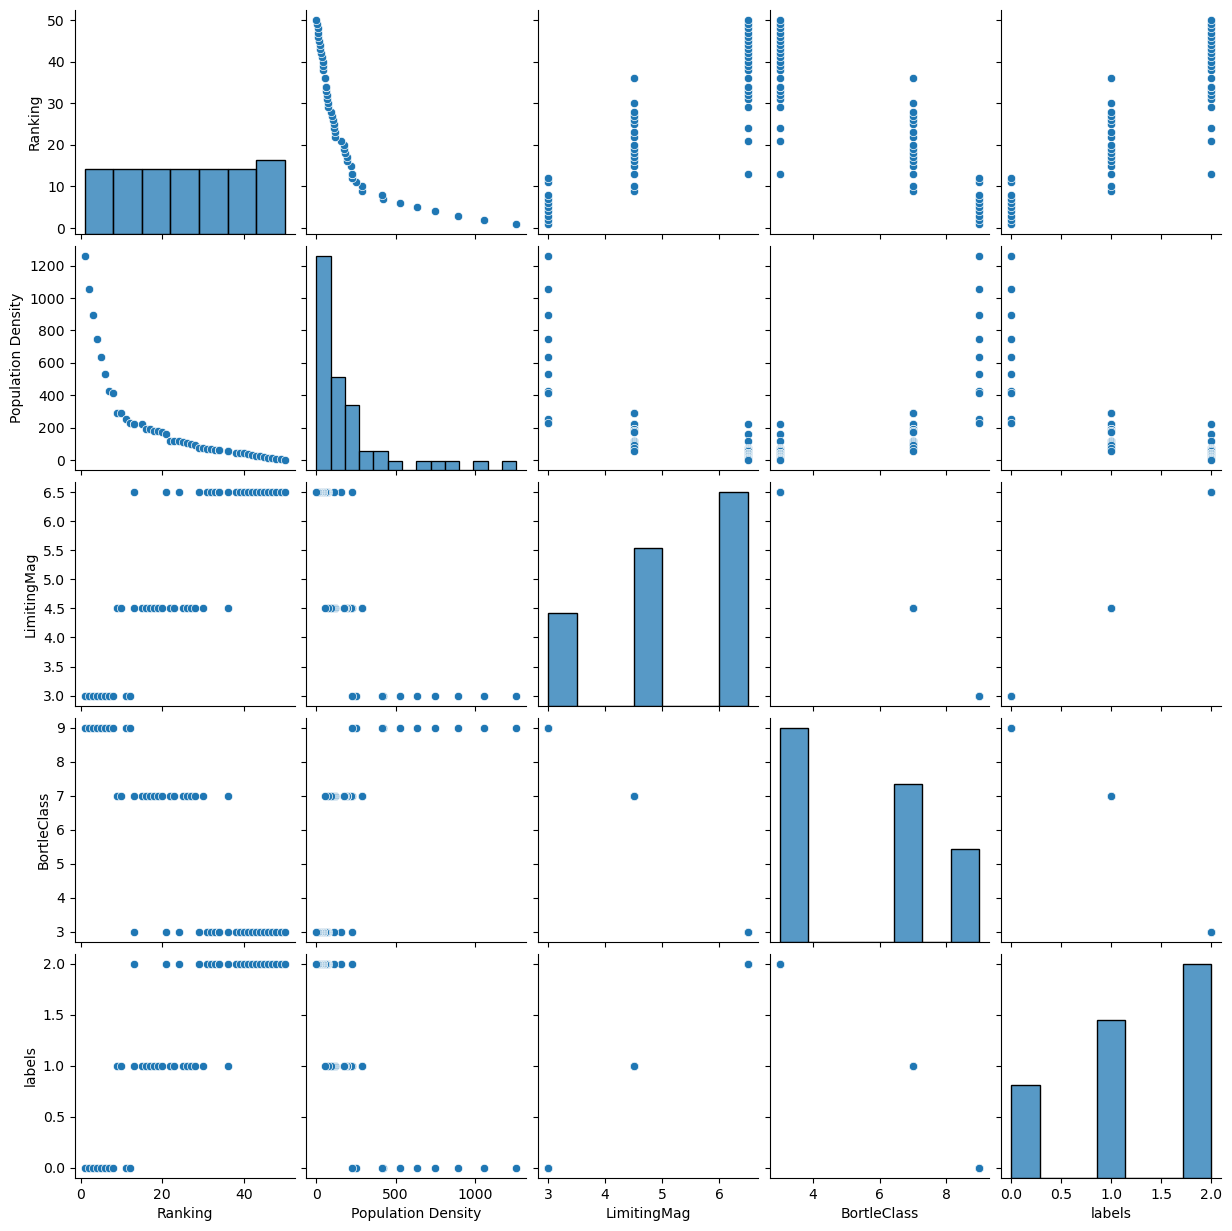

In [34]:
sns.pairplot(data= processed_df)
plt.show()

In [11]:

# Load the packages
from sklearn.model_selection import train_test_split

In [12]:
# Split the data into test and train sets at 30:70 percent splits
features = ['Population Density', 'LimitingMag']
X = processed_df[features]  # Features
y = processed_df['labels']  # Target variable

In [13]:
print(X.shape)
print(y.shape)

(50, 2)
(50,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape of X_train:  ', X_train.shape)
print('Shape of X_test:  ', X_test.shape)
print('Shape of y_train:  ', y_train.shape)
print('Shape of y_test:  ', y_test.shape)

Shape of X_train:   (35, 2)
Shape of X_test:   (15, 2)
Shape of y_train:   (35,)
Shape of y_test:   (15,)


Random Forrest

In [15]:
# Import the package
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rnf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=42)

# fit the model with data
rnf.fit(X_train, y_train)
y_predRF = rnf.predict(X_test)

In [16]:
#Create dataframe to compare
dataRF = {'y_test': y_test, 'y_predRF': y_predRF}
test_predRF = pd.DataFrame(dataRF)
print(test_predRF.shape)
test_predRF.head()

(15, 2)


,y_test,y_predRF
13,1,1
39,2,2
30,2,2
45,2,2
17,1,1


In [17]:
# Find instances where y_pred was incorrect
incorrectRF = test_predRF[test_predRF['y_test'] != test_predRF['y_predRF']]
print(incorrectRF.shape)
incorrectRF.head()

(0, 2)


,y_test,y_predRF


In [18]:
# Calculate scores
accuracyRF = accuracy_score(y_test, y_predRF)
recallRF = recall_score(y_test, y_predRF, average = 'macro')
precisionRF = precision_score(y_test, y_predRF, average = 'macro')
print(f"Accuracy Score: {accuracyRF}")
print(f"Recall score: {recallRF}")
print(f"Precision score: {precisionRF}")

Accuracy Score: 1.0
Recall score: 1.0
Precision score: 1.0


NB

In [19]:
# import the packages
from sklearn.naive_bayes import MultinomialNB

# instantiate the model (using the default parameters)
mnb = MultinomialNB()

# fit the model with data
mnb.fit(X_train, y_train)
y_predNB = mnb.predict(X_test)

In [20]:
#Create dataframe to compare
dataNB = {'y_test': y_test, 'y_predNB': y_predNB}
test_predNB = pd.DataFrame(dataNB)
test_predNB.head()


,y_test,y_predNB
13,1,1
39,2,2
30,2,2
45,2,2
17,1,1


In [21]:
# Find instances where y_pred was incorrect
incorrectNB = test_predNB[test_predNB['y_test'] != test_predNB['y_predNB']]
print(incorrectNB.shape)
incorrectNB.head()

(1, 2)


,y_test,y_predNB
12,2,1


In [22]:
# Calculate scores
accuracyNB = accuracy_score(y_test, y_predNB)
recallNB = recall_score(y_test, y_predNB, average = 'macro')
precisionNB = precision_score(y_test, y_predNB, average = 'macro')
print(f"Accuracy Score: {accuracyNB}")
print(f"Recall score: {recallNB}")
print(f"Precision score: {precisionNB}")

Accuracy Score: 0.9333333333333333
Recall score: 0.9523809523809524
Precision score: 0.9523809523809524


Logistic Regression

In [23]:
# import the packages
from sklearn.linear_model import LogisticRegression

# instantiate the model (using parameters for multiclass)
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [24]:
#Create dataframe to compare
data = {'y_test': y_test, 'y_pred': y_pred}
test_pred = pd.DataFrame(data)
test_pred.head()

,y_test,y_pred
13,1,1
39,2,2
30,2,2
45,2,2
17,1,1


In [25]:
# Find instances where the classification algorithm was incorrect
incorrect = test_pred[test_pred['y_test'] != test_pred['y_pred']]
print(incorrect.shape)
incorrect.head()

(2, 2)


,y_test,y_pred
12,2,1
8,1,0


In [26]:

# Calculate scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average = 'macro')
precision = precision_score(y_test, y_pred, average = 'macro')
print(f"Accuracy Score: {accuracy}")
print(f"Recall score: {recall}")
print(f"Precision score: {precision}")g

Accuracy Score: 0.8666666666666667
Recall score: 0.8968253968253969
Precision score: 0.8333333333333334


## Conclusion

My models worked well, Naive Bayes worked the best, with a 93% accuracy, then Logistic Regression, with a 86% accuracy.  Random Forest didn't work, so I will stick with Naive Bayes.
I believe this is a good start to building a solution that can help people. We can expand this project to go global, and people could use this information to improve their starwatching experience.